In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib

,レベル,基準角度[deg],割合[%]
0,1,0~10,0.0
1,2,10~30,0.0
2,3,30~60,63.0
3,4,60~90,30.6
4,5,90~360,6.4


No handles with labels found to put in legend.
<ipython-input-2-c11ffb2b0d68>:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


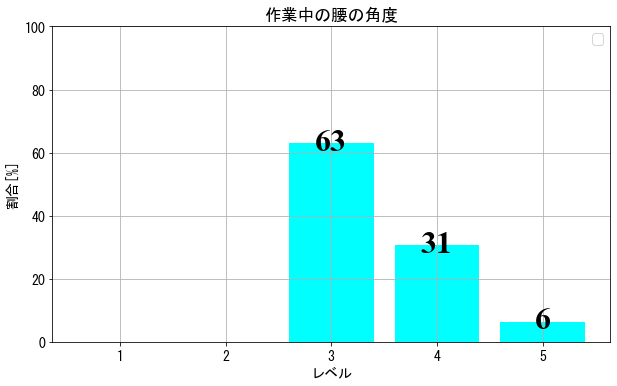

In [2]:

#カラムを用意 #データベース
col_name = [0]
#部位の判断
col_rename= {'task time(ms)':'作業時間(ms)','waist angle':'腰の角度','side angle':'脇の角度','elbow angle':'肘の角度','wrist angle':'手首の角度'}
flame_col=['レベル','基準角度[deg]','割合[%]']
col_nam = 0
data_frame = [0]*5
#格納場所の定義
ratio = [0]*5
standerd = [0]*5
level = [1,2,3,4,5]
#基準値の閾値
low_var = [[0,10,30,60,90],[0,10,30,60,90],[0,10,30,60,90],[90,120,140,160,180],[90,120,140,160,180]]
high_var = [[10,30,60,90,360],[10,30,60,90,360],[10,30,60,90,360],[120,140,160,180,360],[120,140,160,180,360]]

def Preprocessing(set_csv_data):
    #csvデータを読み込む
    df = pd.read_csv(set_csv_data,encoding="shift-jis")
    #カラムの名前を変更
    df = df.rename(columns = col_rename)
    #NaN(欠損値)の削除
    df = df.dropna()
    #小数点第2位まで表示
    df = round(df,3)
    return df

def Ratio(set_data):
    global col_name
    #データの格納
    df = set_data
    #割合を出すために全体のデータ個数を格納
    sum_df = len(df)
    #特定のカラムデータを格納 #['腰の角度','脇の角度','肘の角度','手首の角度']
    i = 0
    #カラムの個数を取得
    col_nam = len(set_data.columns)
    col_name = [0]*col_nam
    while i < col_nam:
        #時間のカラムを除く
        col_name[i] = df.columns[i]
        i += 1
    df = df[col_name]
    
    #基準角度範囲,ループ
    j = 0
    #任意の角度番号
    i = 0
    #データの格納
    while i < col_nam:
        while j < len(level):
            #基準角度の決定
            standerd[j] = str(low_var[i][j]) + "~" + str(high_var[i][j])
            
            #レベルごとの角度を仕分け #エラー箇所
            df_ = (df[(low_var[i][j] < df[col_name[i]]) & (df[col_name[i]] <= high_var[i][j])]).dropna()
            
            ratio[j] = round(len(df_)/sum_df,3)*100
            j += 1
        data_frame[i] = pd.DataFrame([level,standerd,ratio],index=flame_col).T
        i += 1
        j = 0
    drop_frame = dict(zip(col_name,data_frame))
    return drop_frame

def data_plot(plot_data):

    #X,Y軸のデータを格納
    plt.rcParams["font.size"] = 14
    plt.rcParams['font.family'] = 'MS Gothic'
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.rcParams['figure.subplot.bottom'] = 0.15
    
    
    plt.xticks(rotation=0)
    i = 1
    #各角度の棒グラフを出力
    while i < len(col_name):
        x_label = plot_data[col_name[i]][flame_col[2]]
        y_label = plot_data[col_name[i]][flame_col[0]]
        #タイトル：割合[%]
        plt.title(col_name[i])
        plt.ylim(0,100)

        plt.xlabel(plot_data[col_name[i]].columns[0])
        plt.ylabel(plot_data[col_name[i]].columns[2])
        plt.grid()
        plt.bar(y_label,x_label,lw = 6,color='#00ffff')##00ffff
        plt.legend(ncol=1)
        ax = plt.subplot()
        i += 1
        for rect in ax.patches:
            if rect.get_height() > 0:
                cx = rect.get_x() + rect.get_width() / 2
                cy = rect.get_y() + rect.get_height() / 1
                value = f"{rect.get_height():.0f}"
                ax.text(cx, cy, value, color='#000000',ha="center",va="center",size=32,weight='bold',fontfamily='Times New Roman')
        plt.show()
df = Preprocessing('実験２　前傾姿勢作業の腰の角度データ.csv')
df = Ratio(df)
display(df['作業中の腰の角度'])
data_plot(df)

'腰の角度'

,レベル,基準角度[deg],割合[%]
0,1,0~10,0.0
1,2,10~30,0.0
2,3,30~60,70.0
3,4,60~90,28.5
4,5,90~360,1.4


'脇の角度'

,レベル,基準角度[deg],割合[%]
0,1,0~10,0.0
1,2,10~30,11.6
2,3,30~60,22.2
3,4,60~90,66.2
4,5,90~360,0.0


'肘の角度'

,レベル,基準角度[deg],割合[%]
0,1,90~120,41.3
1,2,120~140,33.1
2,3,140~160,0.0
3,4,160~180,0.0
4,5,180~360,0.0


'手首の角度'

,レベル,基準角度[deg],割合[%]
0,1,90~120,0.0
1,2,120~140,0.0
2,3,140~160,45.7
3,4,160~180,54.3
4,5,180~360,0.0


No handles with labels found to put in legend.
<ipython-input-2-c11ffb2b0d68>:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


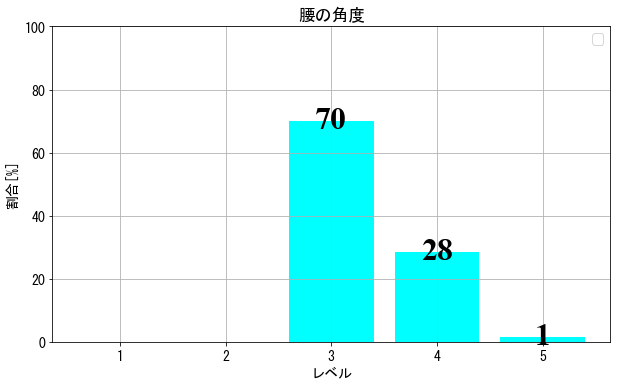

No handles with labels found to put in legend.


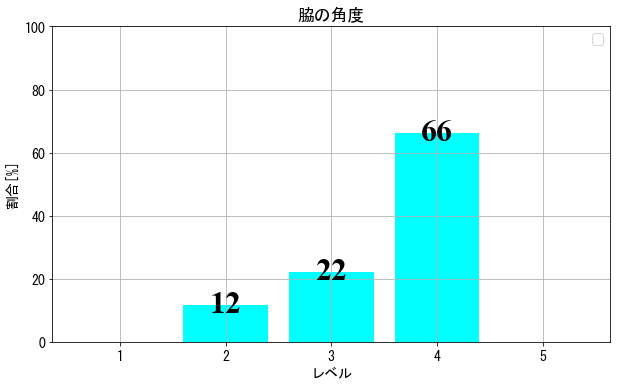

No handles with labels found to put in legend.


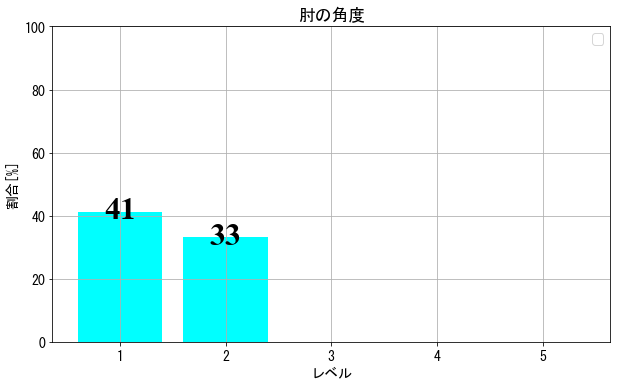

No handles with labels found to put in legend.


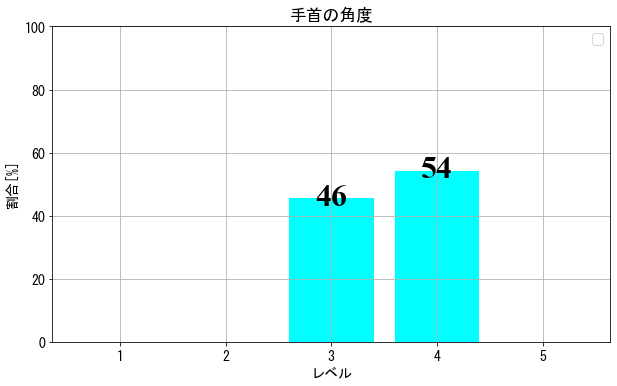

In [3]:
df = Preprocessing('実験2.1いろんな角度.csv')
df = Ratio(df)
i = 1
while i < len(col_name):
    display(col_name[i])
    display(df[col_name[i]])
    i += 1
data_plot(df)